# Project 2, APS1070 Summer 2020
**Anomaly Detection Algorithm using Gaussian Mixture Model [20 Marks]**

**Deadline: June 21, 23:00 - 20 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:

****
*  Name: **Jiani Jia**
*  Student Number: **1002226245**
****

##Part 1: Getting started [6 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

****
* How many rows are there?

  **284807**
* What features in the dataset are present aside from the 28 main features?  
   
  **Time, Amount, Class**
* Which column contains the targets? To what do the values correspond?

  **"Class" column contains the targets. Class 0 means not fraud dataset and Class 1 means fraud dataset**
****

In [ ]:
pip install wget

In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df['rows']= np.arange(0,df['V23'].values.shape[0],1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,rows
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,3
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,284802
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,284803
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,284804
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,284805


In [ ]:
### HERE ###
print("Number of rows is:",df.shape[0])
print("Features aside the 28 main features are:", df.columns[0],",", df.columns[29],",", df.columns[30])

Number of rows is: 284807
Features aside the 28 main features are: Time , Amount , Class


****
It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? 

  **Class 0 is 99.83% and Class 1 0.17%**
* Is this data considered balanced or unbalanced? Why is this the case?
   
  **This data is unbalanced, because there is high quantity difference between the fraud and non-fraud data.**

  **This is a credit card fraud detection dataset, most of the credit card transactions are not fraud and a few of them are fraud transactions, it leads to Class 0 contains 99.83% data and Class 1 contains only 0.17% data.**
* Why is balance/imbalance important? How might this class distribution affect a KNN classifier for example, which we explored in Project 1? 

  **Data balance is important since some algorithms are sensitive to the proportions of the different classes, they tend to fit the class with the largest proportion of non-fraud data and may not correctly classify when the fraud test data come into the model.**

  **The KNN classifier can through the iterations to classify most fraud(minority) data into correct class. From Project 1,the resulting test arruracy can be achieved to more than 90%.** 

****

In [ ]:
### HERE ###
print("Precentage of entires in the dataset for Class 0 is %0.2f" %(df[df['Class']== 0].shape[0]/df.shape[0]*100),"%")
print("Precentage of entires in the dataset for Class 1 is %0.2f" %(df[df['Class']== 1].shape[0]/df.shape[0]*100),"%")

Precentage of entires in the dataset for Class 0 is 99.83 %
Precentage of entires in the dataset for Class 1 is 0.17 %


Next, split the dataset into a training and testing set. Use a test size of one third, and set the random state to 1.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.
****
* What are the mean and standard deviation for variable V11? Make sure to only use your training set for this calculation. 

  **Mean is 0.00035766414366559087**
  
  **Standard derivation is 1.0223616499290018**
****
Use the code below to set up a Gaussian object for V11.

In [ ]:
### Split the data  ###
data = df.drop(columns = 'Class') 
target = df['Class']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 1/3, random_state = 1)

In [ ]:
from scipy import stats

norm = stats.norm(
    
        loc = np.mean(X_train['V11']),  
        scale = np.std(X_train['V11']) 

)
print("Mean for V11 is", norm.mean())
print("Standard derivation for V11 is", norm.std())

Mean for V11 is 0.00035766414366559087
Standard derivation for V11 is 1.0223616499290018


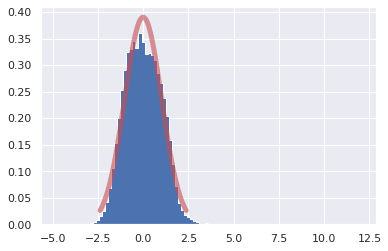

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V11'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()

We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

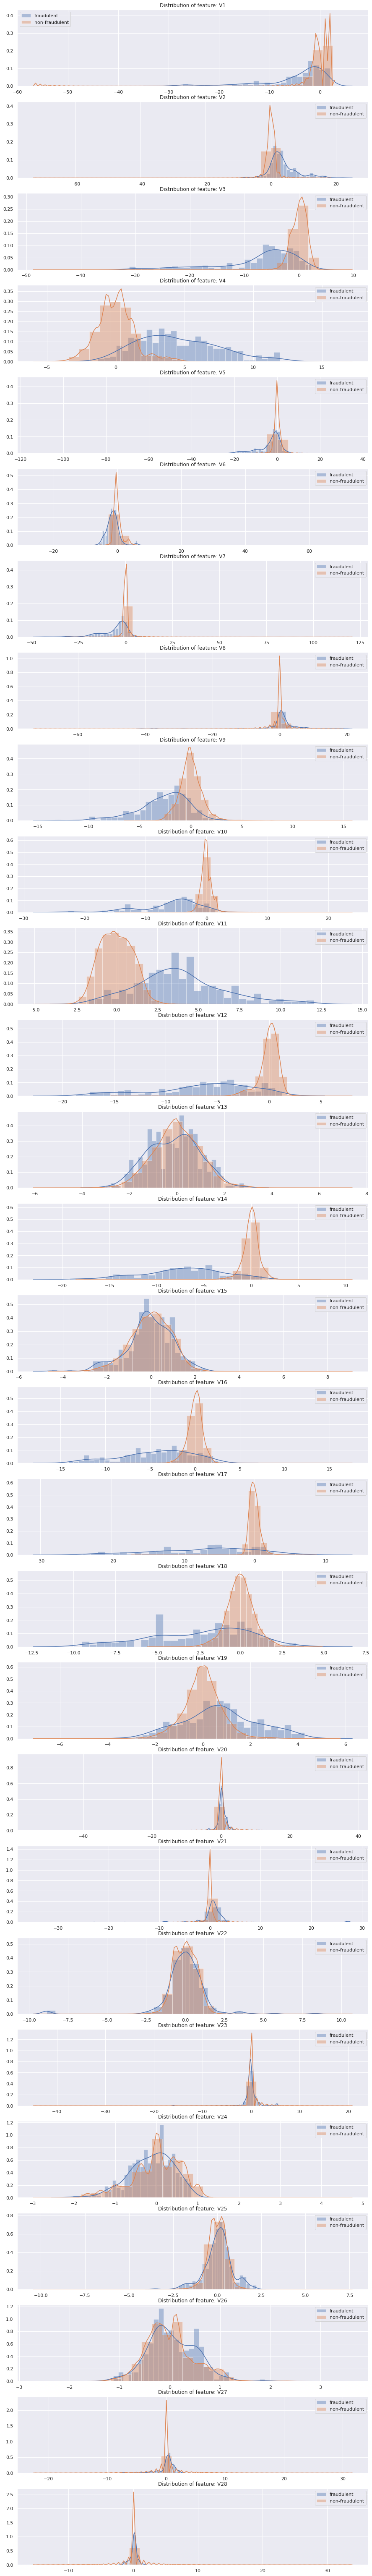

In [ ]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0], bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

****
**Q.** Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[2 Marks]**

**From above PDFs, the variance and mean for both non-fraud data and fraud data can be visualized. For example, both fraud and non-fraud data in V26 have large variance, small variance for both fraud and non-fraud data in V28. For large variance, data separate far away from the mean, more data locate in the tail of the distribution, it can cause more outliers occur. The Gaussian model can help us to visualize the outliers for each feature.**
****

## Part 2: Single Variable Gaussian Distribution: [7 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. Let's explore the following scenarios:

1.   **One Gaussian:** First, we will fit a single gaussian distribution.

  *   Plot a ROC curve for each feature, fitting non-fraudulent transactions.
  *   Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC (Area under the ROC Curve)
  *  To make a prediction, we compute the probability that each transaction in the training set belongs to that distribution. If the probability is lower than a threshold, we consider that transaction a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. Report peformance on the test set as well.

  


2.   **Two Gaussians:** In this case, we will fit a Gaussian to each class in the selected feature above — one gaussian to the feature of non-fraudulent transactions and one gaussian for fraudulent transactions. To make predictions, we use the probability of a transaction belonging to the fraudulent Gaussian distribution and non-fraudulent distribution. 

  * Build a classifier using this two-gaussian approach on the training set, and once complete, test performance on the test set.

Summarize your findings.


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn import metrics
from matplotlib import pyplot


# One Gaussian

[0.7148346743828266, 0.8590723649936337, 0.8735174972880128, 0.8900872090909246, 0.7794534651467675, 0.7351495666158594, 0.8677615239921318, 0.789944735959751, 0.8198803553720555, 0.917244184680951, 0.9083527658246445, 0.9129874904320349, 0.5537101733211636, 0.9570947302425679, 0.5074032647204313, 0.9108707246649491, 0.9311625779652799, 0.8179474368839232, 0.737428100040028, 0.7387149691016812, 0.8390547662817097, 0.5432893654359998, 0.696097136720206, 0.47868547493545155, 0.5726231565565878, 0.5079523309164373, 0.8344074623242275, 0.8131956144641174]
The best feature based on AUC is V14 and AUC value is 0.9571


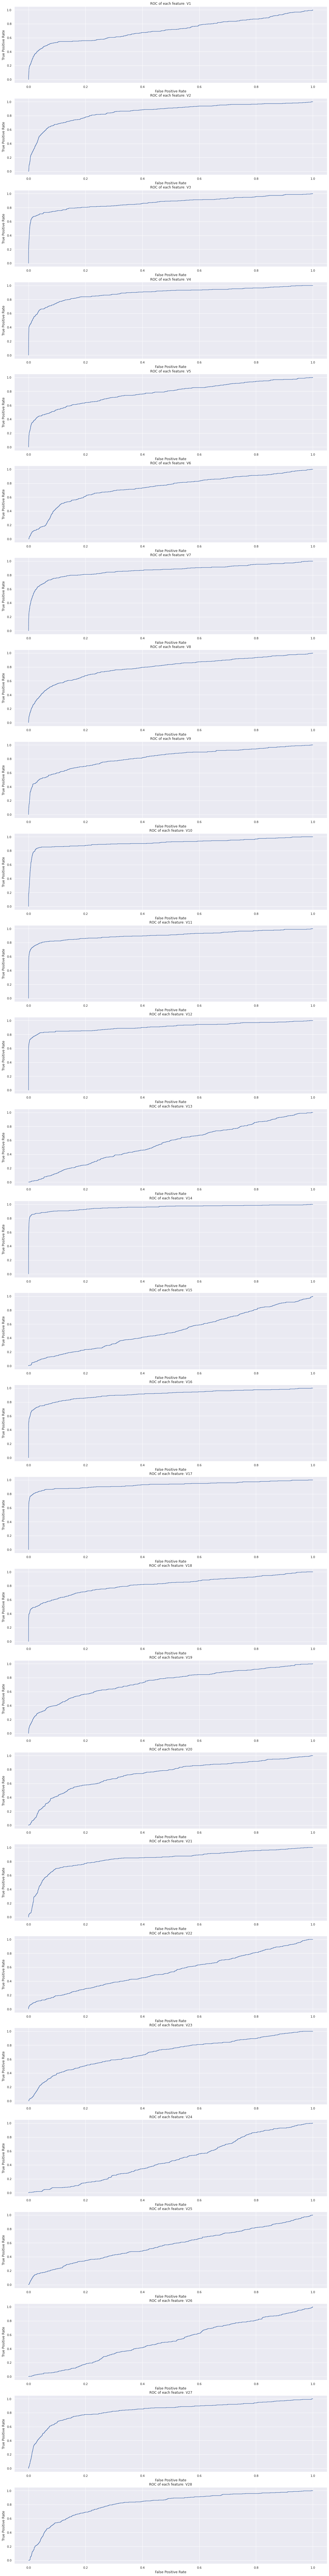

In [ ]:
# One Gaussian 
### HERE ###
# Plot a ROC curve for each feature on training set, fitting non-fraudulent transactions
auc_list = []
features = [f for f in df.columns if 'V' in f]
nplots = np.size(features)
plt.figure(figsize =( 20,6*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
  ax = plt.subplot(gs[i])
  gm_one = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0) 
  gm_one.fit(np.array(X_train[feat][y_train == 0]).reshape(-1,1))
  log_prob = gm_one.score_samples(np.array(X_train[feat]).reshape(-1,1))
  fpr_one, tpr_one, _ = roc_curve(y_train, 1-log_prob)
  auc_one = metrics.auc(fpr_one, tpr_one)
  auc_list.append(auc_one)
  pyplot.plot(fpr_one, tpr_one)
  ax.set_title('ROC of each feature: ' + feat)
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
best_feat = features[auc_list.index(max(auc_list))]
print(auc_list)
print("The best feature based on AUC is", best_feat, "and AUC value is %0.4f" %(max(auc_list)))

The best feature based on AUC is V14 and AUC value is 0.9571.

The optimal threshold that maximizes the F1 Score in the training set is -22.291 and F1 score is 0.624


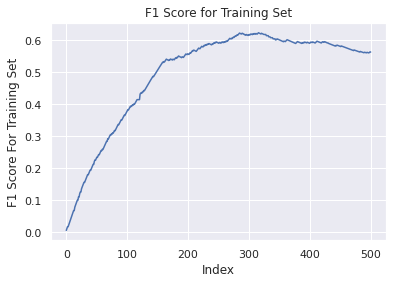

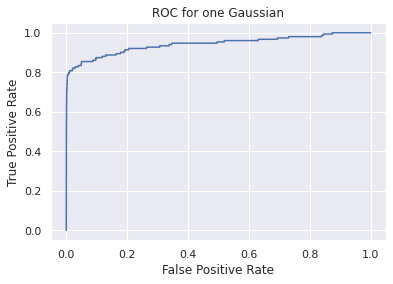

Recall for V14 one Gaussian 0.5562913907284768
precision for V14 one Gaussian 0.6222222222222222
F1 score for one Gaussian test set is 0.587


In [ ]:
# Compute the probability that each transaction in the training set belongs to that distribution.
# If the probability is lower than a threshold, we consider that transaction a fraud. 
f1_train_list = []

gm_one_train = GaussianMixture(n_components = 1,
              covariance_type = 'full', random_state=0) 
gm_one_train.fit(np.array(X_train[best_feat][y_train == 0]).reshape(-1,1))
log_prob_train = gm_one_train.score_samples(np.array(X_train[best_feat]).reshape(-1,1))
threshold_train = np.sort(log_prob_train) #small-large

for i in range(1, 501, 1):
  precision_train = precision_score(y_train, log_prob_train < threshold_train[i]) #0 is non-fraud false = 0
  recall_train = recall_score(y_train, log_prob_train < threshold_train[i])
  f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
  f1_train_list.append(f1_score_train)
max_f1_train = max(f1_train_list)
opt_threshold_train = threshold_train[f1_train_list.index(max(f1_train_list))]
print("The optimal threshold that maximizes the F1 Score in the training set is %0.3f" %(opt_threshold_train), "and F1 score is %0.3f" %(max_f1_train) )
plt.plot(np.linspace(0, 500, 500), f1_train_list)
plt.xlabel('Index')
plt.ylabel('F1 Score For Training Set')
plt.title('F1 Score for Training Set')
plt.show()

# Performance on the test set
log_prob_test = gm_one_train.score_samples(np.array(X_test[best_feat]).reshape(-1,1))
fpr, tpr, _ = roc_curve(y_test, 1-log_prob_test)
pyplot.plot(fpr, tpr)
plt.title('ROC for one Gaussian')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
precision_test = precision_score(y_test, log_prob_test < opt_threshold_train) 
recall_test = recall_score(y_test, log_prob_test < opt_threshold_train)
print("Recall for V14 one Gaussian", recall_test)
print("precision for V14 one Gaussian", precision_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

print("F1 score for one Gaussian test set is %0.3f" %(f1_score_test))

The optimal threshold that maximizes the F1 Score in the training set is -22.291 and F1 score is 0.624.

F1 score for one Gaussian test set is 0.587

**Note :** 

Above graph shows that it is a concave function for the threshold index vs F1 score, which has a maximum point. The corresponding index for the maximum point is around 300. Therefore in the code, the number of loop can be reduecd to 500 to save the running time.

# Two Gaussians

In [ ]:
# Two Gaussians
### HERE ###
# Fit a Gaussian to non-fraudulent transactions and fraudulent transactions 
# Build a classifier using this two-gaussian approach on the training set, and once complete, test performance on the test set.
from prettytable import PrettyTable
table = PrettyTable()
features = [f for f in df.columns if 'V' in f]

gm_one_train = GaussianMixture(n_components = 1,
            covariance_type = 'full', random_state=0) 
for i, feat in enumerate(features):
  train_nonfraud = gm_one_train.fit(np.array(X_train[feat][y_train == 0]).reshape(-1,1))
  log_prob_nonfraud = train_nonfraud.score_samples(np.array(X_test[feat]).reshape(-1,1))


  train_fraud = gm_one_train.fit(np.array(X_train[feat][y_train == 1]).reshape(-1,1))
  log_prob_fraud = train_fraud.score_samples(np.array(X_test[feat]).reshape(-1,1))
  

  # Test performance on the test set for two Gaussian
  y_pred_list = []
  for j in range(0, X_test[feat].shape[0], 1):
     
     if log_prob_nonfraud[j] > log_prob_fraud[j]:
       y_pred = 0
     else:
       y_pred = 1
     y_pred_list.append(y_pred)

  f1_score_two = f1_score(y_test, y_pred_list)
  if feat == 'V14':
    recall = recall_score(y_test, y_pred_list)
    precision = precision_score(y_test, y_pred_list)
    print("Recall for V14 is", recall)
    print("Precision for V14 is", precision)
    print("F1 score on the test set for feature V14 is %0.3f" %(f1_score_two))
  table.field_names = ["Feature", "F1 Score"]
  table.add_row([feat, "%0.3f" %(f1_score_two)])
print(table)

Recall for V14 is 0.8344370860927153
Precision for V14 is 0.04364392102528576
F1 score on the test set for feature V14 is 0.083
+---------+----------+
| Feature | F1 Score |
+---------+----------+
|    V1   |  0.029   |
|    V2   |  0.037   |
|    V3   |  0.067   |
|    V4   |  0.039   |
|    V5   |  0.027   |
|    V6   |  0.014   |
|    V7   |  0.067   |
|    V8   |  0.025   |
|    V9   |  0.021   |
|   V10   |  0.087   |
|   V11   |  0.046   |
|   V12   |  0.046   |
|   V13   |  0.004   |
|   V14   |  0.083   |
|   V15   |  0.005   |
|   V16   |  0.046   |
|   V17   |  0.102   |
|   V18   |  0.021   |
|   V19   |  0.011   |
|   V20   |  0.014   |
|   V21   |  0.030   |
|   V22   |  0.005   |
|   V23   |  0.019   |
|   V24   |  0.004   |
|   V25   |  0.005   |
|   V26   |  0.003   |
|   V27   |  0.030   |
|   V28   |  0.027   |
+---------+----------+


****
**Summary**
 
* For one Gaussian, we use the probability for training dataset to search the optimal threshold which can maximum the F1 score, then apply the optimal threshold to test dataset and see the performance. 

  The F1 score for the training set is 0.624 and for the test set is 0.587. Recall is 0.556, precision is 0.622. 

* For two Gaussian, we use one Gaussian to fit the non-fraud data and the other to fit the fraud data. Compare the two probability that get from the two Gaussians. For a data point, if its probability in non-fraud list larger than probability in fraud list, then this point is predicted as non-fraud. 

  But the F1 score is 0.083 for two Guassian, which is quite small. It may beacuse the precision is quite small (recall is 0.834 and precision is 0.044).Low precision means there are more misjudge fraud data (non-fraud data in actual but predict as fraud data) compared to acutal fraud data. 
 
  Score_sample gives the weighted log probabilities, so that the probabilities will be in different scales for non-fraud and fraud Gaussian. When we do the comparsion between two probability lists, the probability of non-fraud may smaller than fraud probability and cause mispredict that data point to fraud.
   

****

## Part 3: Multivariate and Mixture of Gaussian Distribution [7 Marks]
We want to build an outlier detection model that boosts our F1 score compared to the last part. To design your model, you can benefit from:

*   Any number of features you want (multivariate).
*   You can fit your Gaussians only on non-fraudulent transactions or to both classes.
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).

It is up to you how to design your model. Try at least 5 different models and report the F1 score for each one. If your model requires a threshold to classify transactions, draw a ROC curve for each model, and compare them with part 2.1. Try to maximize your F1 score. What kind of model works better? How many features? Which features? How many Gaussians? How many components? Summarize your findings with tables and plots. 


**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


****
**Model Performance Summary Table**

Model Index | Number of Features | Features Name | Number of Components | Number of Gaussians | F1 Score
---|---|---|:---|:---:|---:
1 | 2 | V14 , V17 | 1 | 1 | 0.645
2 | 2 | V14 , V17 | 2 | 1 | 0.669
3 | 2 | V14 , V17 | 3 | 1 | 0.647
4 | 3 | V12 , V14 , V17 | 1 | 1 | 0.675
5 | 3 | V12 , V14 , V17 | 2 | 1 | 0.673
6 | 3 | V12 , V14 , V17 | 3 | 1 | 0.636
7 | 4 | V12 , V14 , V16, V17 | 1 | 1 | 0.696
8 | 4 | V12 , V14 , V16, V17 | 2 | 1 | 0.651
9 | 5 | V11, V12 , V14 , V16, V17 | 1 | 1 | 0.696
10 | 5 | V11, V12 , V14 , V16, V17 | 2 | 1 | 0.644
11 | 6 | V10, V11, V12 , V14 , V16, V17 | 1 | 1 | 0.727
12 | 6 | V10, V11, V12 , V14 , V16, V17 | 2 | 1 | 0.707
13 | 7 | V4, V10, V11, V12 , V14 , V16, V17 | 1 | 1 | 0.743
14 | 8 | V3, V4, V10, V11, V12 , V14 , V16, V17 | 1 | 1 | 0.736
15 | 9 | V2, V3, V4, V10, V11, V12 , V14 , V16, V17 | 1 | 1 | 0.645


From the above summairzed table, when we add more high AUC features together, the F1 score will increase. Keep the feature number unchange, increase component number, F1 score will decrease. The largest F1 score in above models is when apply seven features V4 V10 V11 V12 V14 V16 and V17 and component number is one, the result F1 score is 0.743. The F1 score for feature V14 one Gaussian is 0.587. They have quite similar ROC curve.

****

In [ ]:
features = [f for f in df.columns if 'V' in f]
feat_nonfraud_train_list = []
feat_train_list = []
feat_nonfraud_test_list = []
feat_test_list = []

for i, feat in enumerate(features):
  feat_nonfraud_train_list.append(np.array(X_train[feat][y_train == 0]).reshape(-1,1))
  feat_train_list.append(np.array(X_train[feat]).reshape(-1,1))
  feat_nonfraud_test_list.append(np.array(X_test[feat][y_test == 0]).reshape(-1,1))
  feat_test_list.append(np.array(X_test[feat]).reshape(-1,1))

In [ ]:
def model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test):
  f1_list = []

  select_feat_train_nonfraud = np.hstack((feature_train_nonfraud))
  select_feat_train = np.hstack((feature_train))

  gm = GaussianMixture(n_components = numb_comp,
              covariance_type = 'full', random_state=0) 
  gm.fit(select_feat_train_nonfraud)
  log_prob_train = gm.score_samples(select_feat_train)
  threshold_train = np.sort(log_prob_train) 

  for i in range(1, 1001, 1):
    precision_train = precision_score(y_train, log_prob_train < threshold_train[i]) 
    recall_train = recall_score(y_train, log_prob_train < threshold_train[i])
    f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
    f1_list.append(f1_score_train)
  max_f1_train = max(f1_train_list)
  opt_threshold_train = threshold_train[f1_train_list.index(max(f1_train_list))]
  print("The optimal threshold that maximizes the F1 Score in the training set is %0.3f" %(opt_threshold_train), "and F1 score is %0.3f" %(max_f1_train) )

  ## Performance on Test Set
  select_feat_test_nonfraud = np.hstack((feature_test_nonfraud))
  select_feat_test = np.hstack((feature_test))

  gm.fit(np.array(select_feat_test_nonfraud))
  log_prob_test = gm.score_samples(select_feat_test)
  fpr, tpr, _ = roc_curve(y_test, 1-log_prob_test)
  pyplot.plot(fpr, tpr)
  plt.title('ROC')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  precision_test = precision_score(y_test, log_prob_test < opt_threshold_train) 
  recall_test = recall_score(y_test, log_prob_test < opt_threshold_train)
  f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
  print("F1 score is %0.3f" %(f1_score_test))

The optimal threshold that maximizes the F1 Score in the training set is -44.664 and F1 score is 0.624


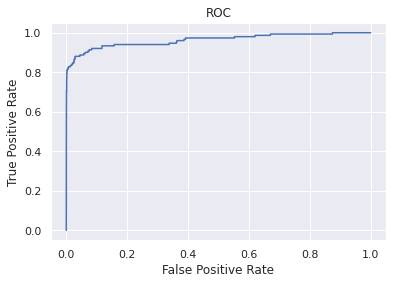

F1 score is 0.637


In [ ]:
# Two Features V14 V17 | 1 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[13], feat_nonfraud_train_list[16]
feature_train = feat_train_list[13], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[13], feat_nonfraud_test_list[16]
feature_test = feat_test_list[13], feat_test_list[16]
numb_comp = 1
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -22.448 and F1 score is 0.624


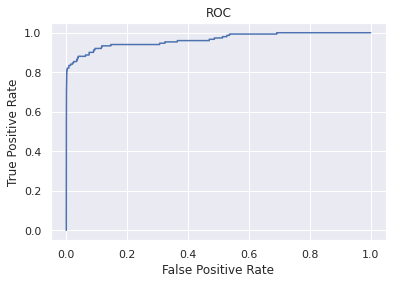

F1 score is 0.653


In [ ]:
# Two Features V14 V17 | 2 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[13], feat_nonfraud_train_list[16]
feature_train = feat_train_list[13], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[13], feat_nonfraud_test_list[16]
feature_test = feat_test_list[13], feat_test_list[16]
numb_comp = 2
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -17.724 and F1 score is 0.624


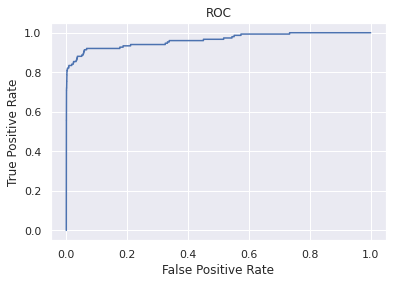

F1 score is 0.631


In [ ]:
# Two Features V14 V17 | 3 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[13], feat_nonfraud_train_list[16]
feature_train = feat_train_list[13], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[13], feat_nonfraud_test_list[16]
feature_test = feat_test_list[13], feat_test_list[16]
numb_comp = 3
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -57.815 and F1 score is 0.624


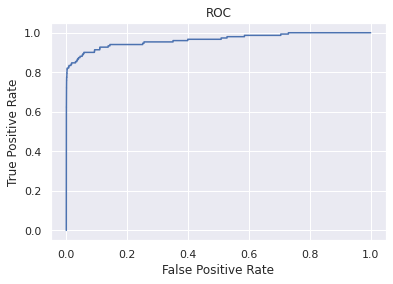

F1 score is 0.675


In [ ]:
# Three Features V12 V14 V17 | 1 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[16]
feature_train = feat_train_list[11], feat_train_list[13], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[16]
feature_test = feat_test_list[11], feat_test_list[13], feat_test_list[16]
numb_comp = 1
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -27.293 and F1 score is 0.624


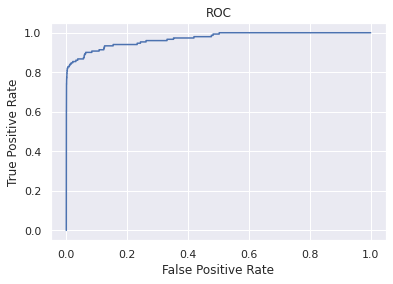

F1 score is 0.662


In [ ]:
# Three Features V12 V14 V17 | 2 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[16]
feature_train = feat_train_list[11], feat_train_list[13], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[16]
feature_test = feat_test_list[11], feat_test_list[13], feat_test_list[16]
numb_comp = 2
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -27.056 and F1 score is 0.624


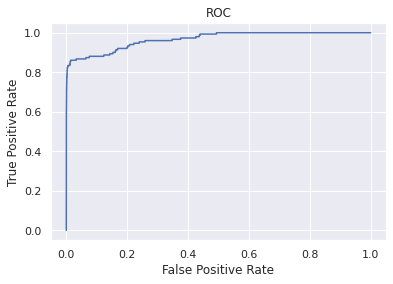

F1 score is 0.637


In [ ]:
# Three Features V12 V14 V17 | 3 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[16]
feature_train = feat_train_list[11], feat_train_list[13], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[16]
feature_test = feat_test_list[11], feat_test_list[13], feat_test_list[16]
numb_comp = 3
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -73.081 and F1 score is 0.624


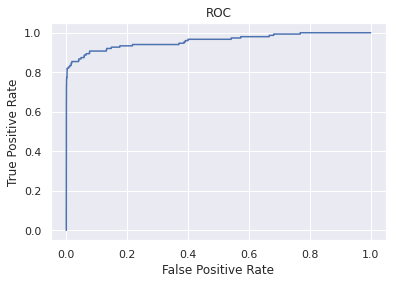

F1 score is 0.696


In [ ]:
# Four Features V12 V14 V16 V17 | 1 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[15], feat_nonfraud_train_list[16]
feature_train = feat_train_list[11], feat_train_list[13], feat_train_list[15], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[15], feat_nonfraud_test_list[16]
feature_test = feat_test_list[11], feat_test_list[13], feat_test_list[15], feat_test_list[16]
numb_comp = 1
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -29.213 and F1 score is 0.624


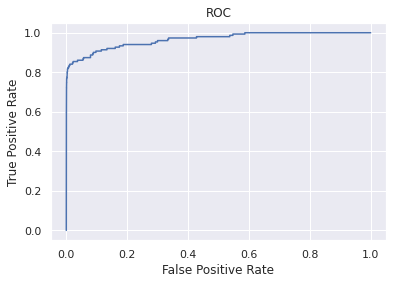

F1 score is 0.639


In [ ]:
# Four Features V12 V14 V16 V17 | 2 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[15], feat_nonfraud_train_list[16]
feature_train = feat_train_list[11], feat_train_list[13], feat_train_list[15], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[15], feat_nonfraud_test_list[16]
feature_test = feat_test_list[11], feat_test_list[13], feat_test_list[15], feat_test_list[16]
numb_comp = 2
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -83.916 and F1 score is 0.624


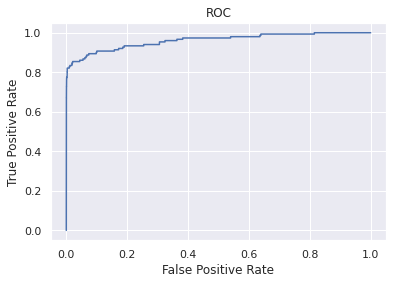

F1 score is 0.712


In [ ]:
## Five Features V11 V12 V14 V16 V17 | 1 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[10], feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[15], feat_nonfraud_train_list[16]
feature_train = feat_train_list[10], feat_train_list[11], feat_train_list[13], feat_train_list[15], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[10], feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[15], feat_nonfraud_test_list[16]
feature_test = feat_test_list[10], feat_test_list[11], feat_test_list[13], feat_test_list[15], feat_test_list[16]
numb_comp = 1
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -32.063 and F1 score is 0.624


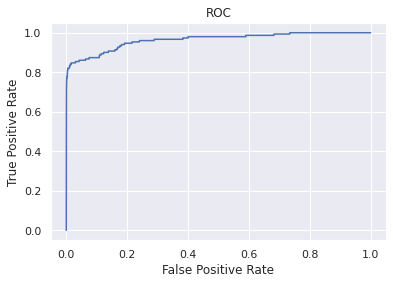

F1 score is 0.645


In [ ]:
## Five Features V11 V12 V14 V16 V17 | 2 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[10], feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[15], feat_nonfraud_train_list[16]
feature_train = feat_train_list[10], feat_train_list[11], feat_train_list[13], feat_train_list[15], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[10], feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[15], feat_nonfraud_test_list[16]
feature_test = feat_test_list[10], feat_test_list[11], feat_test_list[13], feat_test_list[15], feat_test_list[16]
numb_comp = 2
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -106.145 and F1 score is 0.624


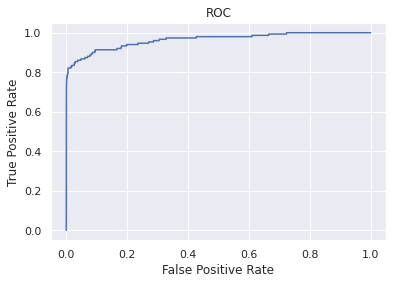

F1 score is 0.734


In [ ]:
## Six Features V10 V11 V12 V14 V16 V17 | 1 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[9], feat_nonfraud_train_list[10], feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[15], feat_nonfraud_train_list[16]
feature_train = feat_train_list[9], feat_train_list[10], feat_train_list[11], feat_train_list[13], feat_train_list[15], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[9], feat_nonfraud_test_list[10], feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[15], feat_nonfraud_test_list[16]
feature_test = feat_test_list[9], feat_test_list[10], feat_test_list[11], feat_test_list[13], feat_test_list[15], feat_test_list[16]
numb_comp = 1
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -34.838 and F1 score is 0.750


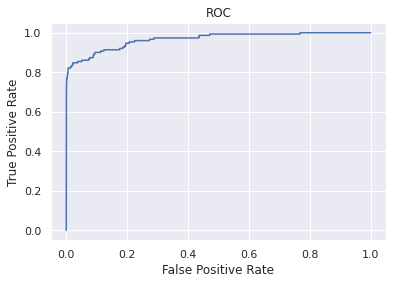

F1 score is 0.707


In [ ]:
## Six Features V10 V11 V12 V14 V16 V17 | 2 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[9], feat_nonfraud_train_list[10], feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[15], feat_nonfraud_train_list[16]
feature_train = feat_train_list[9], feat_train_list[10], feat_train_list[11], feat_train_list[13], feat_train_list[15], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[9], feat_nonfraud_test_list[10], feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[15], feat_nonfraud_test_list[16]
feature_test = feat_test_list[9], feat_test_list[10], feat_test_list[11], feat_test_list[13], feat_test_list[15], feat_test_list[16]
numb_comp = 2
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -114.133 and F1 score is 0.624


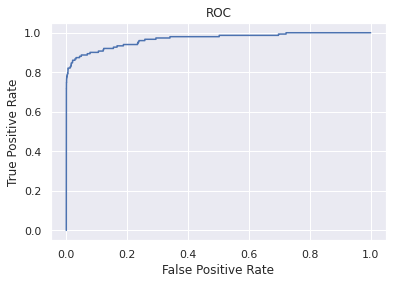

F1 score is 0.743


In [ ]:
## Seven Features V4 V10 V11 V12 V14 V16 V17 | 1 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[3], feat_nonfraud_train_list[9], feat_nonfraud_train_list[10], feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[15], feat_nonfraud_train_list[16]
feature_train = feat_train_list[3], feat_train_list[9], feat_train_list[10], feat_train_list[11], feat_train_list[13], feat_train_list[15], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[3], feat_nonfraud_test_list[9], feat_nonfraud_test_list[10], feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[15], feat_nonfraud_test_list[16]
feature_test = feat_test_list[3], feat_test_list[9], feat_test_list[10], feat_test_list[11], feat_test_list[13], feat_test_list[15], feat_test_list[16]
numb_comp = 1
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -138.486 and F1 score is 0.624


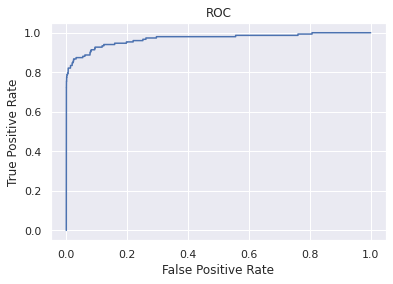

F1 score is 0.736


In [ ]:
## Eight Features V3 V4 V10 V11 V12 V14 V16 V17 | 1 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[2], feat_nonfraud_train_list[3], feat_nonfraud_train_list[9], feat_nonfraud_train_list[10], feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[15], feat_nonfraud_train_list[16]
feature_train = feat_train_list[2], feat_train_list[3], feat_train_list[9], feat_train_list[10], feat_train_list[11], feat_train_list[13], feat_train_list[15], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[2], feat_nonfraud_test_list[3], feat_nonfraud_test_list[9], feat_nonfraud_test_list[10], feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[15], feat_nonfraud_test_list[16]
feature_test = feat_test_list[2], feat_test_list[3], feat_test_list[9], feat_test_list[10], feat_test_list[11], feat_test_list[13], feat_test_list[15], feat_test_list[16]
numb_comp = 1
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)

The optimal threshold that maximizes the F1 Score in the training set is -172.863 and F1 score is 0.624


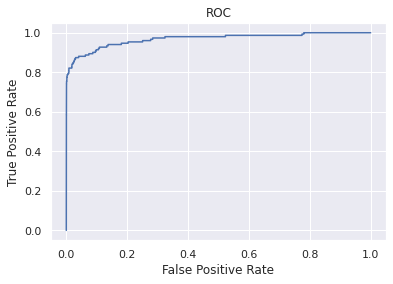

F1 score is 0.645


In [ ]:
## Nine Features V2 V3 V4 V10 V11 V12 V14 V16 V17 | 1 component | 1 Gaussian
feature_train_nonfraud = feat_nonfraud_train_list[1], feat_nonfraud_train_list[2], feat_nonfraud_train_list[3], feat_nonfraud_train_list[9], feat_nonfraud_train_list[10], feat_nonfraud_train_list[11], feat_nonfraud_train_list[13], feat_nonfraud_train_list[15], feat_nonfraud_train_list[16]
feature_train = feat_train_list[1], feat_train_list[2], feat_train_list[3], feat_train_list[9], feat_train_list[10], feat_train_list[11], feat_train_list[13], feat_train_list[15], feat_train_list[16]
feature_test_nonfraud = feat_nonfraud_test_list[1], feat_nonfraud_test_list[2], feat_nonfraud_test_list[3], feat_nonfraud_test_list[9], feat_nonfraud_test_list[10], feat_nonfraud_test_list[11], feat_nonfraud_test_list[13], feat_nonfraud_test_list[15], feat_nonfraud_test_list[16]
feature_test = feat_test_list[1], feat_test_list[2], feat_test_list[3], feat_test_list[9], feat_test_list[10], feat_test_list[11], feat_test_list[13], feat_test_list[15], feat_test_list[16]
numb_comp = 1
model(feature_train_nonfraud, feature_train, numb_comp, feature_test_nonfraud, feature_test)